# Лабораторная работа №1

### 1. Численные методы решения СЛАУ

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Методы численного решения СЛАУ
from comp_math.linear_algebra.sla_solvers.SLA_solvers_registry import SLASolverRegistry
from comp_math.linear_algebra.objects.matrix import Matrix
from comp_math.linear_algebra.objects.vector import Vector

Добавим СЛАУ с которой будет работать

In [2]:
# Из задачника Аристова-Лобанова пункт Д)
A = Matrix(np.zeros((100, 100)))
b = Vector(np.zeros(100))
n = b.dim

for k in range(n):
    start_j = max(0, k - 4)
    end_j = min(99, k + 4)
    
    for j in range(start_j, end_j + 1):
        if j == k:
            A[k, j] = 10
        else:
            A[k, j] = 1
    
    b[k] = k + 1

Выведем матрицу, чтобы убедиться в её корректности

In [3]:
for i in range(0, A.shape[0]):
    print(A[i])

[10.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1. 10.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1. 10.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

Перечислим методы для решения СЛАУ, которые будут использоваться (метод гаусса реализован, но граифик для него построить естественно не получиться)

In [4]:
methods = [
        (SLASolverRegistry.create_solver("jacobi"), "Метод Якоби"),
        (SLASolverRegistry.create_solver("zeidel"), "Метод Зейделя"),
        (SLASolverRegistry.create_solver("relaxation"), "Метод релаксации"),
        (SLASolverRegistry.create_solver("cg"), "Сопряжённые градиенты"),
        (SLASolverRegistry.create_solver("bcg"), "Бисопряжённые градиенты"),
        (SLASolverRegistry.create_solver("sbcg"), "Стабилизированный BCG")
    ]

Решим этими методами нашу СЛАУ

In [6]:
results = []

for solver, name in methods:
    x = solver.solve(A, b)
    residuals = solver.get_errors
    iterations = solver.iterations_count
    final_error = solver.last_error
    
    results.append({
        'name': name,
        'iterations': iterations,
        'final_error': final_error,
        'residuals': residuals,
        'solution': x
    })

Посмотрим на первые 10 значений вектлоров решений:

In [26]:
for i, result in enumerate(results):
    print(f"{result['name']} - f{result['solution'][:10]}")

Метод Якоби - f[0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]
Метод Зейделя - f[0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]
Метод релаксации - f[0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]
Сопряжённые градиенты - f[0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]
Бисопряжённые градиенты - f[0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]
Стабилизированный BCG - f[0.02292139 0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296]


Видно, что методы выдают одинаковые решения(что решения корректные можно убедиться запустив тест (../tests/test_linear_algebra/test_SLA_solvers.py))

#### Строим графики
Сначала логарифмический масштаб по обеим осям

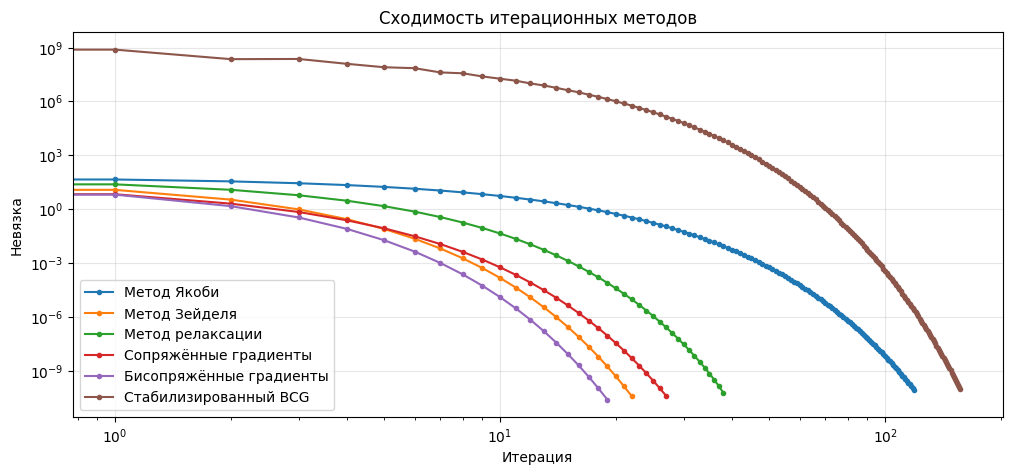

In [14]:
plt.figure(figsize=(12, 5))
for res in results:
    residuals = res['residuals']
    plt.loglog(residuals, 'o-', label=res['name'], markersize=3)

plt.xlabel('Итерация')
plt.ylabel('Невязка')
plt.title('Сходимость итерационных методов')
plt.legend()
plt.grid(alpha=0.3)

И то же самое где логарифмический масштаб только по одной оси

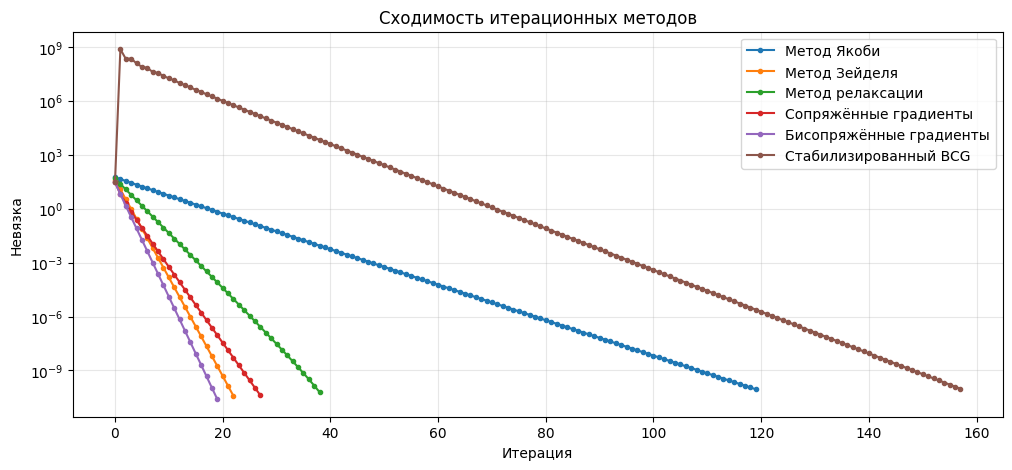

In [17]:
plt.figure(figsize=(12, 5))
for res in results:
    residuals = res['residuals']
    plt.semilogy(residuals, 'o-', label=res['name'], markersize=3)

plt.xlabel('Итерация')
plt.ylabel('Невязка')
plt.title('Сходимость итерационных методов')
plt.legend()
plt.grid(alpha=0.3)

И посмотрим на конечные ошибки методов

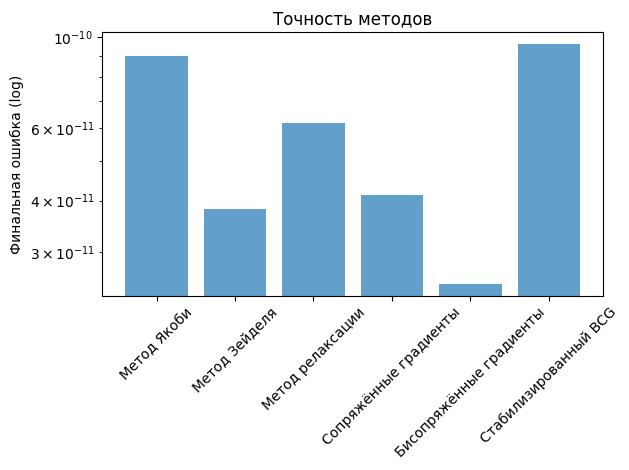

In [24]:
names = [res['name'] for res in results]
errors = [res['final_error'] for res in results]

plt.bar(names, errors, alpha=0.7)
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('Финальная ошибка (log)')
plt.title('Точность методов')
plt.tight_layout()
plt.show()